# Earthquakes Coursework 

## Required Packages 


In [3]:
!pip install folium

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
import scipy as sp 
import scipy.stats
import seaborn as sb
from datetime import datetime
import folium as folium
from branca.element import Figure

## Short hand Methods used for time saving

In [4]:
def NewQ(): # method just for visually sepearating the dataframes (just in case i forgot to delte all of them)
    print("****************************")
    print()

def p(*arg): # shorthand print function 
    for i in arg:
        print(i, end = " ")
    print()
    

    

# Data Exploration
## Task 1.1. Within the zip file I provided you there is a comma separated variable file. Import the earthquakes.csv file as a dataframe. Use the read csv method, which you have seen in your lectures.

In [5]:
df = pd.read_csv("earthquakes.csv")
p(df)

       Unnamed: 0                      time    latitude     longitude   depth  \
0               0  2021-09-09T15:01:24.860Z  34.1406667  -117.4443333    6.97   
1               1  2021-09-09T14:34:10.002Z     69.5984     -144.0757    8.50   
2               2  2021-09-09T14:27:54.070Z  38.5561676  -119.4169998    2.21   
3               3  2021-09-09T14:19:45.135Z     69.4772     -143.4635    0.00   
4               4  2021-09-09T13:15:07.930Z     62.9704     -150.9256  111.80   
...           ...                       ...         ...           ...     ...   
20005        5420  2021-07-04T22:05:21.866Z     27.9695      127.8472   10.00   
20006        8780  2021-05-18T18:07:33.480Z     36.8515      135.0632  382.39   
20007        2489  2021-08-08T06:16:01.899Z     41.4144      142.0761   64.73   
20008       17590  2021-01-25T20:34:06.096Z      24.957      122.6254   10.00   
20009       17432  2021-01-28T02:07:08.504Z     42.9785      146.5009   35.00   

        mag magType   nst  

## Task 1.2. In the dataset you have been provided with, identify the earthquake with the largest magnitude. When and where did it occur

In [161]:
max = df['mag'].max() #assigning the maximum value to a variable (max)
p(max)
for i in range(len(df['mag'])): #iterate throught the indexes 
    if df['mag'][i] == max: #compare for all values in the column till found then use index for the print values 
        index = i
        print("The largest Magnitude earthquake was of magnitude " + str(max))
        print("the location of the Source of the largest erthquake was " + str(df['locationSource'][i]))
        print("the date of the largest magnitude earthquake was " + str(df['time'][i]))
        print("the location of the Split of the largest magnitude earthquake was " + str(df['place_split'][i]))


8.2 
The largest Magnitude earthquake was of magnitude 8.2
the location of the Source of the largest erthquake was ak
the date of the largest magnitude earthquake was 2021-07-29T06:15:49.188Z
the location of the Split of the largest magnitude earthquake was ['99', 'km', 'SE', 'of', 'Perryville,', 'Alaska']


## Task 1.3. Create another dataframe consisting of the ten largest earthquakes and sort them in descending order. This frame should contain the following information: time, place, latitude, longitude, magnitude. Print out this dataframe using print. In this dataframe, rename the mag series as magnitude.

In [162]:
dfL = df.sort_values(by = 'mag', ascending = False).head(10) #sorting the largest ten by desending 
#dfL = dfL.sort_Values(by = 'mag', ascending = False)
#print(dfL)
dfL = dfL.transpose().loc[['time','place_split','latitude','longitude','mag']] # fix columns 
dfL = dfL.transpose().sort_values(by = 'mag', ascending = False)
#p(dfL)
#p(dfL.columns)
dfL = dfL.rename(columns = {'mag':'magnitude'}) # rename 
p(dfL)


                           time  \
3688   2021-07-29T06:15:49.188Z   
14516  2021-03-04T19:28:33.178Z   
2128   2021-08-12T18:35:20.989Z   
16473  2021-02-10T13:19:55.530Z   
2130   2021-08-12T18:32:52.464Z   
14540  2021-03-04T17:41:23.370Z   
8563   2021-05-21T18:04:13.565Z   
14598  2021-03-04T13:27:34.647Z   
1677   2021-08-14T12:29:08.422Z   
2223   2021-08-11T17:46:13.142Z   

                                             place_split  latitude  longitude  \
3688   ['99', 'km', 'SE', 'of', 'Perryville,', 'Alaska']   55.3635  -157.8876   
14516         ['Kermadec', 'Islands,', 'New', 'Zealand']  -29.7228  -177.2794   
2128          ['South', 'Sandwich', 'Islands', 'region']  -58.4513    -25.327   
16473   ['southeast', 'of', 'the', 'Loyalty', 'Islands']  -23.0511   171.6566   
2130          ['South', 'Sandwich', 'Islands', 'region']  -57.5674   -25.0316   
14540         ['Kermadec', 'Islands,', 'New', 'Zealand']  -29.6768  -177.8398   
8563                   ['Southern', 'Qinghai,',

# Data Cleaning
## Task 2.1. There are 10 NaN entries in the mag series you have been provided with. Find these entries and insert them in a separate dataframe with the following columns: time, magnitude, place, latitude and longitude. Then, remove these entries from the dataset using methods you have learnt in the lectures.

In [163]:
ListOfNanIndexesTwo_One = [] 
for i in range(len(df.isna())): # for all indexes of the rows that contain nans 
    if df['mag'].isna()[i]: # if nan in mag column 
        ListOfNanIndexesTwo_One.append(i) #append index to list 
    if len(ListOfNanIndexesTwo_One) == 10: # optimize code as we know there are only 10 nans from the question 
        break

dfnan = pd.DataFrame(columns = {'time','mag','place', 'latitude', 'longitude'}) # sort the columns as we require 
p(dfnan)

for i in range(1,len(ListOfNanIndexesTwo_One)):
    dfnan = dfnan.append(df.loc[[ListOfNanIndexesTwo_One[i]]]) # append all the indexes we declared were nans from earlier 
p(dfnan)


Empty DataFrame
Columns: [longitude, latitude, time, place, mag]
Index: [] 
       longitude latitude                      time  \
3378   -157.0347   55.109  2021-07-30T04:30:48.332Z   
4733   -174.3896  52.0664  2021-07-12T22:04:42.753Z   
7855    -148.266   62.463  2021-05-31T08:47:19.061Z   
11352  -153.6841  58.7333  2021-04-09T03:23:15.287Z   
11354  -148.2646  62.4232  2021-04-09T02:40:19.103Z   
15321  -159.8357  54.3624  2021-02-22T00:42:41.868Z   
17862   -153.627  59.2338  2021-01-21T19:29:16.445Z   
17921  -159.3386  55.0518  2021-01-21T05:06:29.620Z   
17953  -152.5936  60.1364  2021-01-20T15:58:27.418Z   

                                         place  mag  Unnamed: 0   depth  \
3378             157 km SSE of Chignik, Alaska  NaN      3378.0   40.00   
4733                  19 km SW of Atka, Alaska  NaN      4733.0  186.41   
7855             74 km N of Chickaloon, Alaska  NaN      7855.0   44.50   
11352             87 km NNW of Aleneva, Alaska  NaN     11352.0    4.60  

## Task 2.2. There are 10 sets of entries which are duplicates. In this task, you will search for them and keep just one copy from each set of duplicates. Note that when you search for the duplicates, you should base your search on magnitude, time, place, latitude and longitude. Before you remove the duplicates, you should print them out in a dataframe which contains the columns: time, mag, place, latitude, longitude.


In [164]:
ListOfColsForDupSearch = ['time', 'mag', 'place', 'latitude', 'longitude'] #list of the columns to check for duplicates 

dfPrintDup = pd.DataFrame(columns = {'time', 'mag', 'place', 'latitude', 'longitude'}) #DataFrame used for the final print 
dfdup = pd.DataFrame(columns = {'time', 'mag', 'place', 'latitude', 'longitude'}) #DataFrame used to solve question 
ListOfDupIndexesTwo_Two = [] # List of all the duplicates index values 

n = df.duplicated().sum() #Amount of Values duplicated 
dfTrue = df.duplicated().sort_values().tail(n) # The last n duplicates only 

for i in dfTrue.index:
    ListOfDupIndexesTwo_Two.append(i)

for i in ListOfDupIndexesTwo_Two:
    dfPrintdup = dfPrintDup.append(df.iloc[[i]])
   
p("This is the DataFrame containing all the Duplicate enteries:")
p(dfPrintDup)
p("(Now to remove the duplicates)")
try:
    dfdup = dfdup.drop_dupliactes()
except:
    print("Exception: There are no duplicates to be removed from the DataFrame when we restrict the Columns to ",
          "\n",  (ListOfColsForDupSearch))

This is the DataFrame containing all the Duplicate enteries: 
Empty DataFrame
Columns: [longitude, latitude, time, place, mag]
Index: [] 
(Now to remove the duplicates) 
Exception: There are no duplicates to be removed from the DataFrame when we restrict the Columns to  
 ['time', 'mag', 'place', 'latitude', 'longitude']


## Task 2.3. There are 10 misformatted entries in the data set you have been provided. In particular, the latitude and longitude columns contain strings rather than floats. Locate these and change the type of the latitude and longitude entries in these rows from string to float. You should output your result in a separate dataframe containing these ten entries.

In [165]:
dfMiss = df[["latitude","longitude"]] # the columns we care about 
dfMissToPrint = pd.DataFrame(columns = {"latitude", "longitude"}) # dataframe for the answer 
#p(df) # now we have the cols we care about 

#ConvertToFloat = lambda x: float(x)
#pd.to_numeric(dfMiss)
L =[]    #list of the index values of misformatted enteries 
for Col in dfMiss:#check each collumn 
    for index in range(len(dfMiss.index)): #check each index (row) for the column 
        #t = type(dfMiss[Col].values[index])
        try:
            dfMiss[Col].values[index] = float(dfMiss[Col].values[index]) # try to conver to float for all values 
        except:
            L.append(index) # if the value wouldnt convert add to the list of missformatted indexes 

#p(L)
L = set(L)
L = list(L) #cheeky way to get rid of duplicates by casting to set then casting to list again 
#p(str(len(L))) # there are now 10 values not 20 

for i in L:
    #p(dfMiss.loc[i])
    dfMissToPrint = dfMissToPrint.append(dfMiss.loc[i]) # append all the rows of the index values we assigned to the 
    #list to the DataFrame we wish to show the answer with  

p(dfMissToPrint.sort_index(ascending = True)) # sort the values for a nicer look 



             longitude         latitude
478    1/7/2/./3/3/4/7  -/4/1/./4/1/7/1
3169   1/7/2/./2/1/4/7  -/4/3/./6/0/7/5
4391   1/7/2/./4/1/2/1  -/4/3/./6/1/2/9
7742   1/7/2/./5/8/9/2  -/4/3/./6/0/7/8
8360   1/7/2/./7/1/1/1  -/4/3/./5/6/2/4
11266  1/7/4/./5/3/4/8  -/4/1/./4/8/9/1
11676  1/7/2/./6/9/9/9  -/4/3/./6/0/5/9
12256    1/7/4/./1/9/4  -/3/8/./5/4/4/4
15568  1/7/2/./7/9/3/5  -/4/3/./5/1/4/8
19576  1/7/2/./7/1/3/6  -/4/3/./5/2/0/3 


# Task 2.4. There are 10 outliers in the data set you have been provided. In particular, for these ten entries, the magnitude is a negative value. Find these 10 outliers and output them in a dataframe containing the time, place, magnitude, latitude and longitude. Then change the sign of these ten entries to positive.

In [166]:
AbsoluteValue = lambda x: abs(x) # Lambda function for the use of the apply method
L = [] #list of outliers 

df = pd.read_csv("earthquakes.csv")
dfOutliers = df[['time', 'place', 'mag', 'latitude','longitude']] # all the columns we care about taken from df 
dfOutliersToPrint = pd.DataFrame(columns = {'time', 'place', 'mag', 'latitude','longitude'}) #dataframe to show answer later 

for i in range(len(dfOutliers.index)): #for every index value 
    if dfOutliers.mag.values[i] <0: #check if its non negative 
        L.append(i) # if it is negative add to the outliers index list 
#p(L)

dfOutliers.mag = dfOutliers.mag.apply(AbsoluteValue) # ammend the outlier values with the lmabda function 
#p(df24)

for i in L:
    #p(df24.loc[i])
    dfOutliersToPrint = dfOutliersToPrint.append(dfOutliers.loc[i]) #append the indexes to the answer datframe 

p(dfOutliersToPrint.sort_index(ascending = True))


      longitude latitude                      time  \
618    -67.0248  17.9423  2021-08-27T21:16:31.420Z   
662    -66.9111  17.9738  2021-08-27T03:51:31.550Z   
6621   -66.7943  17.9983  2021-06-16T17:08:36.130Z   
6717   -66.8542  17.7987  2021-06-15T06:32:24.175Z   
8517   -66.8315  17.9558  2021-05-22T00:05:24.740Z   
15859  -66.8146  17.9195  2021-02-15T10:29:40.160Z   
16325  -66.9096   17.764  2021-02-11T02:40:16.600Z   
16485   -66.808  17.9196  2021-02-10T09:11:44.070Z   
17349   -66.834  17.9326  2021-01-29T12:03:18.190Z   
18550  -66.8933   17.924  2021-01-13T07:21:28.930Z   

                                      place  mag  
618    4 km SSE of La Parguera, Puerto Rico  2.5  
662         0 km NW of Guánica, Puerto Rico  2.5  
6621      2 km S of Guayanilla, Puerto Rico  2.5  
6717      19 km SSE of Guánica, Puerto Rico  2.5  
8517        4 km SSW of Indios, Puerto Rico  2.5  
15859         8 km S of Indios, Puerto Rico  2.5  
16325       22 km S of Guánica, Puerto Rico  2.5

C:\Users\noelh\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Task 2.5. Make six separate dataframes containing the subset of the earthquakes that occurred in the vicinity of the following locations: Alaska, Japan, California, New Zealand, Afghanistan and Puerto Rico. Each dataframe should contain the following columns: time, magnitude, place, latitude, longitude. NOTE: California may be present in the dataset in both shorthand and full i.e. California or CA.

In [167]:
df = pd.read_csv("earthquakes.csv")
df2 = pd.DataFrame(columns = {'time', 'place', 'mag', 'latitude','longitude'})
ListOfAreas = ['Alaska', 'Japan', 'New Zealand', 'Afghanistan', 'Puerto Rico','CA', 'California'] #all the places we care about
dfAlaska = df2; dfJapan = df2; dfNewZealand = df2; dfAfghanistan = df2 ;dfPuertoRico = df2 ; dfCali = df2 # all 6 dfs 
dfBenchMark = df[['time', 'place', 'mag', 'latitude','longitude']] # the full dataframe with all countries to be manipulated with only the columns we need 

dfBenchMark = dfBenchMark.fillna("") #filling the nans before errors occur 

for i in range(len(ListOfAreas)):
    p("Checking the DataFrame for the place '", str(ListOfAreas[i]), "' Please wait till completion message arrives")
    for j in dfBenchMark.index: #for all index values 
        #p(j)
        if ListOfAreas[i] in dfBenchMark.place[j]: # check for the country name in the column "place", 
            #then append to the correct dataframe as the indexes of the Areas and the dataframe to do with the area a 
            #simple if statement version of a switch tool from c# can be used to fill all dataframes 
                if i == 0:
                    dfAlaska = dfAlaska.append(dfBenchMark.loc[j])
                elif i == 1:
                    dfJapan = dfJapan.append(dfBenchMark.loc[j])
                elif i == 2:
                    dfNewZealand = dfNewZealand.append(dfBenchMark.loc[j])
                elif i == 3:
                    dfAfghanistan = dfAfghanistan.append(dfBenchMark.loc[j])
                elif i == 4:
                    dfPuertoRico = dfPuertoRico.append(dfBenchMark.loc[j])
                elif i == 5:
                    dfCali = dfCali.append(dfBenchMark.loc[j])
                elif i == 6:
                    dfCali = dfCali.append(dfBenchMark.loc[j])
    p( str(ListOfAreas[i]),"-DataFrame Completed")


#p(dfAlaska.place)
#p(dfAfghanistan.place)
#p(dfCali.place)
#p(dfCali['place'].duplicated().any())
#p(dfCali['place'].duplicated().sum())
#p(dfCali['place'].drop_duplicates())
#p(dfCali)
p()
p("All 6 DataFrames have been created")
p("The dupliactes from California DataFrame have been removed ")
p("ALL NANs in the Place column of every DataFrame have been ignored and filled with blank values")



Checking the DataFrame for the place ' Alaska ' Please wait till completion message arrives 
Alaska -DataFrame Completed 
Checking the DataFrame for the place ' Japan ' Please wait till completion message arrives 
Japan -DataFrame Completed 
Checking the DataFrame for the place ' New Zealand ' Please wait till completion message arrives 
New Zealand -DataFrame Completed 
Checking the DataFrame for the place ' Afghanistan ' Please wait till completion message arrives 
Afghanistan -DataFrame Completed 
Checking the DataFrame for the place ' Puerto Rico ' Please wait till completion message arrives 
Puerto Rico -DataFrame Completed 
Checking the DataFrame for the place ' CA ' Please wait till completion message arrives 
CA -DataFrame Completed 
Checking the DataFrame for the place ' California ' Please wait till completion message arrives 
California -DataFrame Completed 

All 6 DataFrames have been created 
The dupliactes from California DataFrame have been removed  
ALL NANs in the Plac

## Task 2.6. In cases where there are missing data values, one possibility is to forward or backward fill from preceding, subsequent values. Suppose that you have missing magnitude values in the data set you have beenprovided with. Given the nature of the particular data set, write a short paragraph within a markdown cell to motivate whether or not filling in the missing values using forward or backward fill would be appropriatein this case.


'''No, filling in the values forward or backwards would not be a good idea as the Series 'mag' is not sorted hence there is no
clear path to show that the next value would be greater or smaller. You could estimate the value if the uknown value was in a sorted data set and you knew it lay within 
two values but since that is not the case it is unwise to fill as it is a complete guess 
'''

# 3 Data Manipulation
##  3.1 Create a dataframe containing the following descriptive statistics as series:
• Mean earthquake magnitude,
• Standard deviation of the magnitude,
• Median earthquake magnitude,
• Number of earthquakes in the dataset.
• Date of the first earthquake.
• Date of the last earthquake.
for all of the following areas: Alaska, Canada, Washington, Oregon, California and Mexico

In [168]:
def CollectStats(df,Country,dfStats): 
    #method for collecting Statistics we care about with arbitrary dataframe to be collected from 
    MagMean = df.mag.mean()
    MagStd = df.mag.std()
    MadMed = df.mag.median()
    NumberOfEQS = len(df.index)
    DateFirst = df.time.min()
    DateLast = df.time.max()
    CountryName = Country
    #Below is the new row to be appended to the new DataFrame only to do with the staistics we care about 
    Row = pd.DataFrame({'Mean Earthquake Mag': MagMean, 'Std Dev Of Mag':MagStd,'Median Earthquake Mag':MadMed, 'Number of Earthquakes': NumberOfEQS,'Date Of First Earthquake' : DateFirst,
                       'Date Of Last Earthquake': DateLast,'Country Name':CountryName}, index = [Country])
    dfStats = dfStats.append(Row) # append 
    p(dfStats)
    return dfStats #return the new dataframe 

df.place = df.place.fillna("") #fill all nans before errors occur in the collumn Place 
#making individual dataframe for all place we care about only including the country in quetion (should have used method for efficiency)
dfAlaska = df.loc[df['place'].str.contains('Alaska')]
dfCanada = df.loc[df['place'].str.contains('Canada')]
dfWashington = df.loc[df['place'].str.contains('Washington')]
dfOregon = df.loc[df['place'].str.contains('Oregon')]
dfCalifornia = df.loc[df['place'].str.contains('California')]
dfMexico = df.loc[df['place'].str.contains('Mexico')]

ListDfs = [dfAlaska,dfCanada,dfWashington,dfOregon,dfCalifornia,dfMexico] #all the dataframes in one list 
ListAreas = ['Alaska', 'Canada', 'Washington', 'Oregon', 'California', 'Mexico'] 
ListCols = ["Mean Earthquake Mag", "Std Dev Of Mag","Median Earthquake Mag",
            "Number of Earthquakes","Date Of First Earthquake", "Date Of Last Earthquake","Country Name"] # all the collumns we want 
dfStats = pd.DataFrame(columns = ListCols) #creating the new staistics dataframe 


for i in range(len(ListDfs)): # for all the dataframes
    dfStats = CollectStats(ListDfs[i],ListAreas[i],dfStats) #fill with all the data we care about using the method above

        


        Mean Earthquake Mag  Std Dev Of Mag  Median Earthquake Mag  \
Alaska             3.051788        0.552264                    2.9   

       Number of Earthquakes  Date Of First Earthquake  \
Alaska                  3561  2020-12-26T01:46:52.634Z   

         Date Of Last Earthquake Country Name  
Alaska  2021-09-09T14:34:10.002Z       Alaska   
        Mean Earthquake Mag  Std Dev Of Mag  Median Earthquake Mag  \
Alaska             3.051788        0.552264                   2.90   
Canada             3.011364        0.573584                   2.73   

       Number of Earthquakes  Date Of First Earthquake  \
Alaska                  3561  2020-12-26T01:46:52.634Z   
Canada                    44  2020-12-28T14:19:50.178Z   

         Date Of Last Earthquake Country Name  
Alaska  2021-09-09T14:34:10.002Z       Alaska  
Canada  2021-08-27T15:49:29.696Z       Canada   
            Mean Earthquake Mag  Std Dev Of Mag  Median Earthquake Mag  \
Alaska                 3.051788        0

## 3.2 For each of the data sets in Task 3.1, determine the mean earthquake frequency and the average period that elapses between successive earthquakes (you do not need to account for aftershocks). Calculate the mean frequency in earthquakes/day. Calculate the mean period by calculating all the inter-earthquake intervals in days and divide by the number of intervals. Present your results in a dataframe.


In [169]:



ListCols2 =["Mean Earthquake Frequency", "Average Period Between Successive Earthquakes"] # the collumns we want 
dfFreq = pd.DataFrame(columns= ListCols2) # new dataframe we want 

def MeanPeriod(dfCountry): # Not used, an accurate estimation has been substitued, (#Frequncy = 1/period.)
    dfCountry.time = dfCountry.time.sort_index(ascending = True )
    differenceList = []

    for i in range(len(dfCountry.time)-1):

        x = dfCountry.time[i][0:(21)].replace("-", " ").replace("T", " ")
        y = dfCountry.time[i+1][0:(21)].replace("-", " ").replace("T", " ")
        datei = datetime.isoformat(x, '%Y %m %d')
        datei2 = datetime.strptime(y, '%Y %m %d')
        dateInterval = datei - datei2
        differenceList.append(dateInterval)
        AverageTime = differenceList.avg()
        return AverageTime
        


def meanEqFreq(dfCountry,dfFreq,Country): #figure out value of frequency and append 
    x = dfCountry.time.max()[0:(10)].replace("-", " ")#make max/min time readable by making it into the correct format 
    y = dfCountry.time.min()[0:(10)].replace("-", " ")
    dateMax = datetime.strptime(x, '%Y %m %d') #indicate what format the DateTime is in 
    dateMin = datetime.strptime(y, '%Y %m %d')
    dateInterval = dateMax - dateMin # days difference 
    days = dateInterval.days
    MeanEQFREQ = (len(dfCountry.index))/days # frequence = amount of times/ interval 
    meanPeriod = 1/(MeanEQFREQ) #Frequncy = 1/period.therefore Period = 1/frequence
    #meanPeriod = MeanPeriod(dfCountry)
    
    #Below, we create new row to be added 
    Row = pd.DataFrame({"Mean Earthquake Frequency":MeanEQFREQ, "Average Period Between Successive Earthquakes":meanPeriod, "CountryName":Country}, index = [Country] )
    dfFreq =  dfFreq.append(Row)
    return dfFreq


for i in range(len(ListDfs)): #iterate through all the dataframes we want to apply this to 
    dfFreq = meanEqFreq(ListDfs[i], dfFreq, ListAreas[i]) # send to function to figure out values and append 
p(dfFreq)


            Mean Earthquake Frequency  \
Alaska                      13.856031   
Canada                       0.181818   
Washington                   0.078189   
Oregon                       0.396825   
California                   0.161826   
Mexico                       1.722656   

            Average Period Between Successive Earthquakes CountryName  
Alaska                                           0.072171      Alaska  
Canada                                           5.500000      Canada  
Washington                                      12.789474  Washington  
Oregon                                           2.520000      Oregon  
California                                       6.179487  California  
Mexico                                           0.580499      Mexico   


## 3.3 Combine the dataframes from Task 3.1 into a single data set and produce the new summary statistics described in the previous two tasks for the combined data. Produce a new, single dataframe with the combined statistics for each of the individual locations and the combined locations (i.e. a total of 7 rows).


In [170]:
p(dfStats) 

            Mean Earthquake Mag  Std Dev Of Mag  Median Earthquake Mag  \
Alaska                 3.051788        0.552264                   2.90   
Canada                 3.011364        0.573584                   2.73   
Washington             2.851579        0.319796                   2.80   
Oregon                 3.459300        0.803863                   3.20   
California             2.929249        0.516465                   2.80   
Mexico                 3.520181        0.847631                   3.30   

           Number of Earthquakes  Date Of First Earthquake  \
Alaska                      3561  2020-12-26T01:46:52.634Z   
Canada                        44  2020-12-28T14:19:50.178Z   
Washington                    19  2020-12-28T10:41:34.670Z   
Oregon                       100  2020-12-29T07:10:29.079Z   
California                    39  2021-01-05T14:31:47.484Z   
Mexico                       441  2020-12-26T10:15:55.223Z   

             Date Of Last Earthquake Country N

# Data visualisation 4
## 4.1 Create histograms for the earthquake magnitudes for each of Alaska, California, Canada, Oregon, Washington and Mexico. Each histogram should contain 20 bins. Then, create another histogram for the combined locations (from Task 3.3) with 60 bins. Ensure that the histograms are titled and labelled.


In [171]:
dfCombined = pd.DataFrame(columns = ListCols) 

for i in ListAreas:
    dfCombined = dfCombined.append(df.loc[df['place'].str.contains(i)])

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'place_split'],
      dtype='object')
7 


<IPython.core.display.Javascript object>


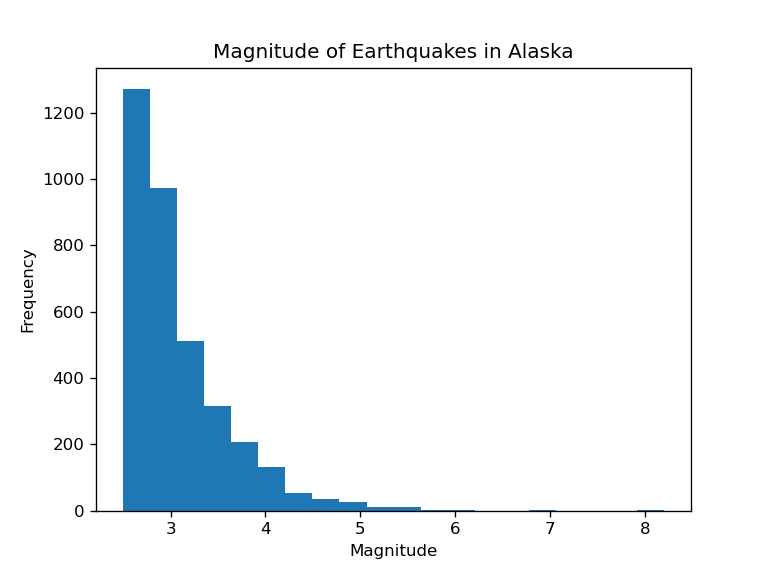

<IPython.core.display.Javascript object>


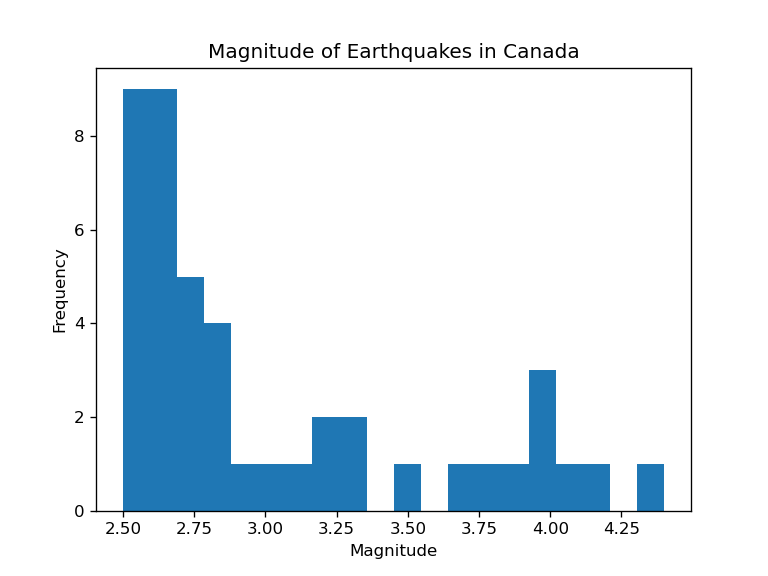

<IPython.core.display.Javascript object>


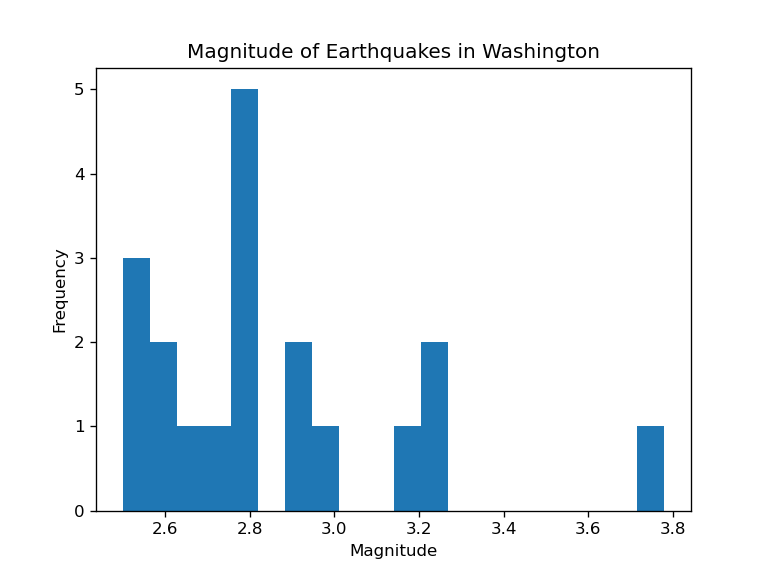

<IPython.core.display.Javascript object>


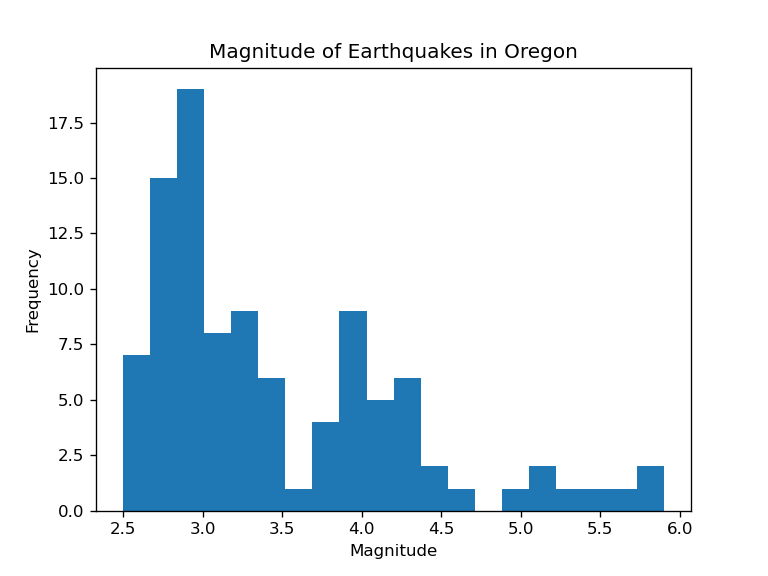

<IPython.core.display.Javascript object>


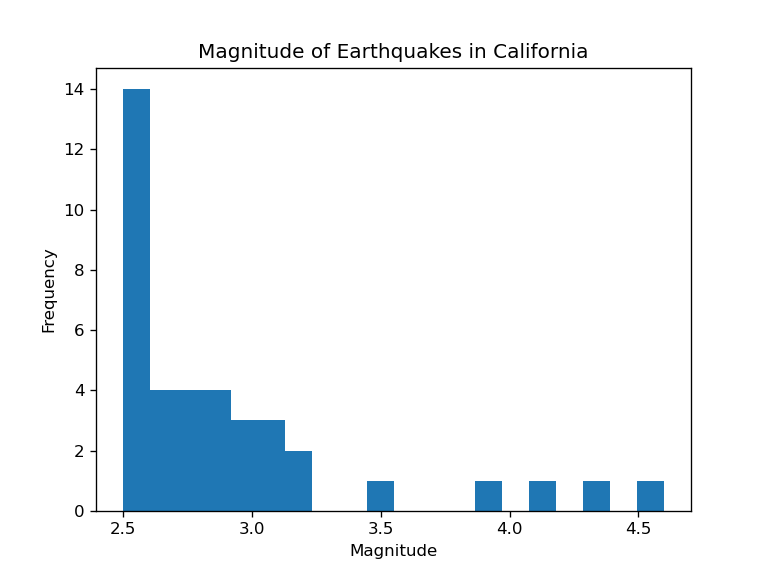

<IPython.core.display.Javascript object>


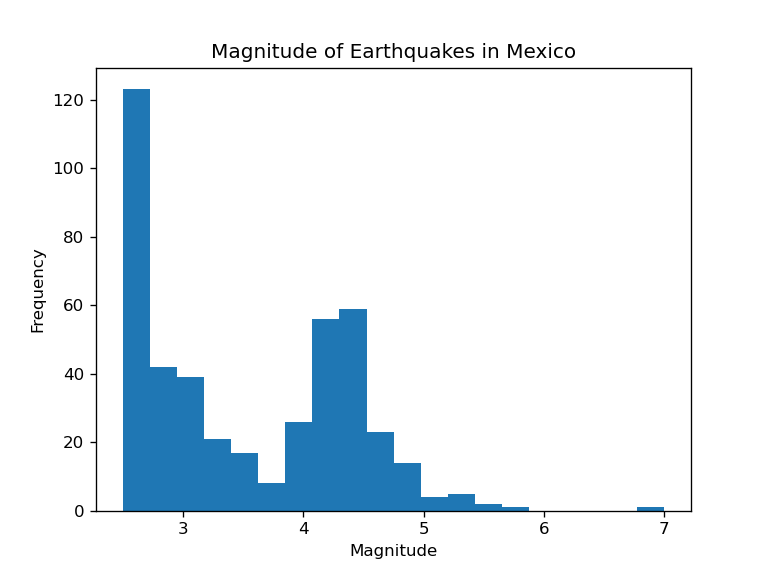

<IPython.core.display.Javascript object>


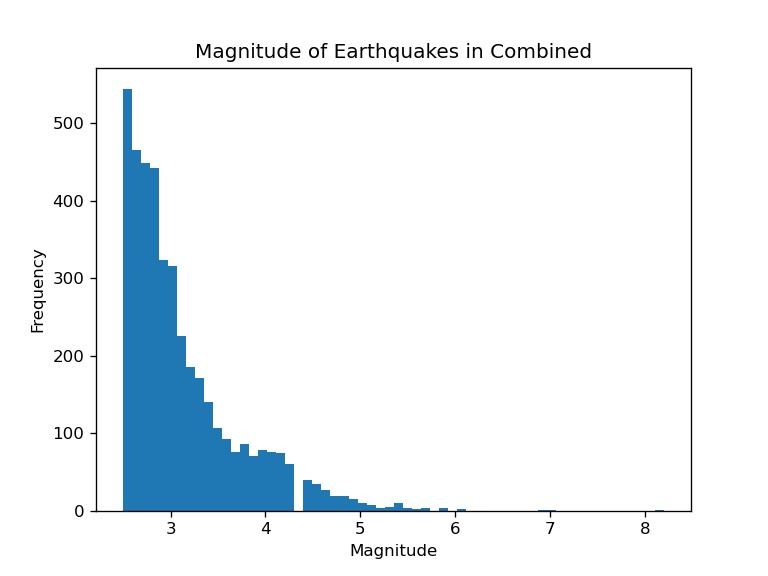

In [172]:
print(df.columns)
#dfCombined = df.loc[]
ListDfs.append(dfCombined)
ListAreas.append("Combined")
ListOfHistos = []
p(len(ListDfs))
for i in range(0,7):
    fig = plt.figure()
    if i == 6:
        
        x = ListDfs[i].mag.plot.hist(bins = 60, title = str("Magnitude of Earthquakes in "
                                                            + ListAreas[i]), xlabel= "Magnitude")
        x.set_xlabel("Magnitude")
        ListOfHistos.append(x)
    else:
        
        x = ListDfs[i].mag.plot.hist(bins = 20, title = str("Magnitude of Earthquakes in "
                                                            + ListAreas[i]), xlabel = "Magnitude")
        x.set_xlabel("Magnitude")
        ListOfHistos.append(x)

## Task 4.2. Normalize the histograms and fit normal distributions to the all the datasets from task 4.1 by creating new plots. Ensure that your plots have correct titles, labels and legends. Is a normal distribution the most appropriate in practice for this particular dataset? If not, what is an appropriate model for obtaining the exceedance probability of a given earthquake magnitude? Write a short paragraph in a markdown cell.

In [193]:
#best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
dfAlaska.mag.head()

1    2.8
3    2.6
4    2.5
8    2.5
9    3.0
Name: mag, dtype: float64

<IPython.core.display.Javascript object>


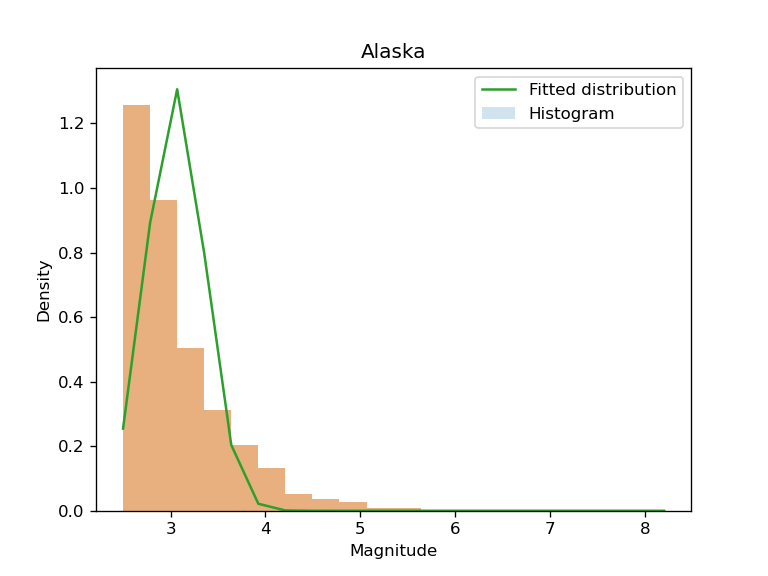

3.0517882286680003 


<IPython.core.display.Javascript object>


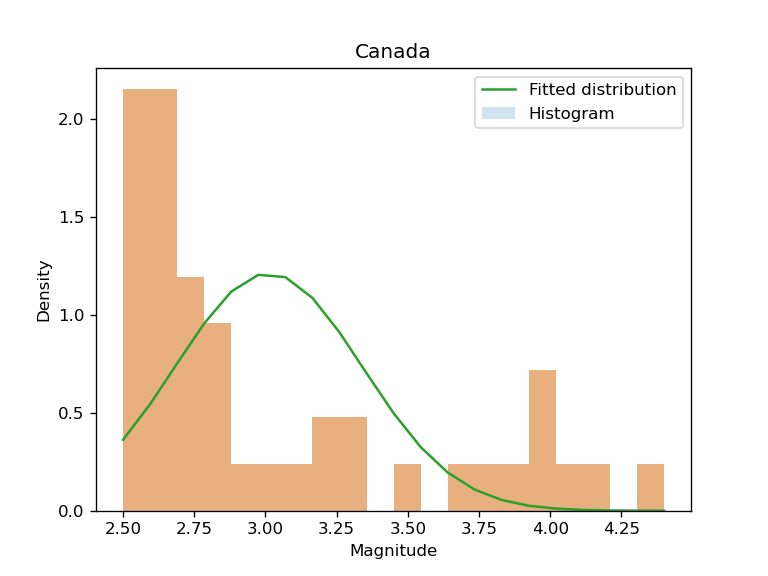

3.011363636363636 


<IPython.core.display.Javascript object>


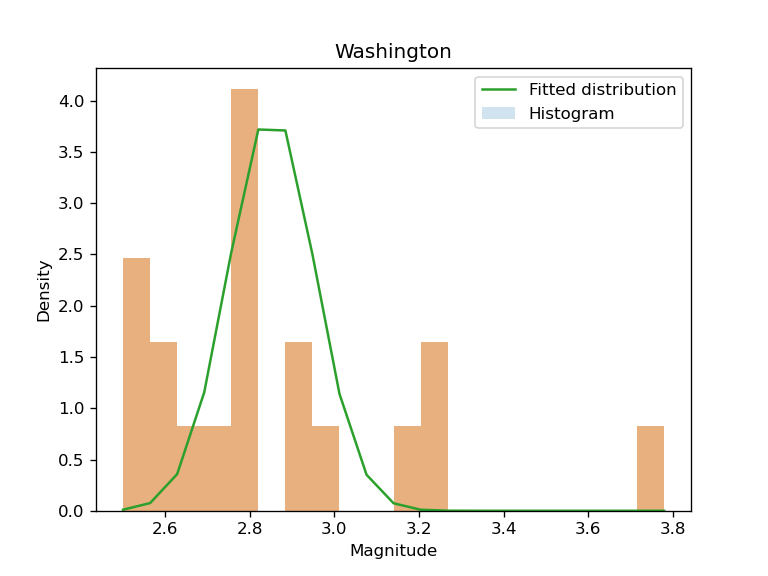

2.8515789473684205 


<IPython.core.display.Javascript object>


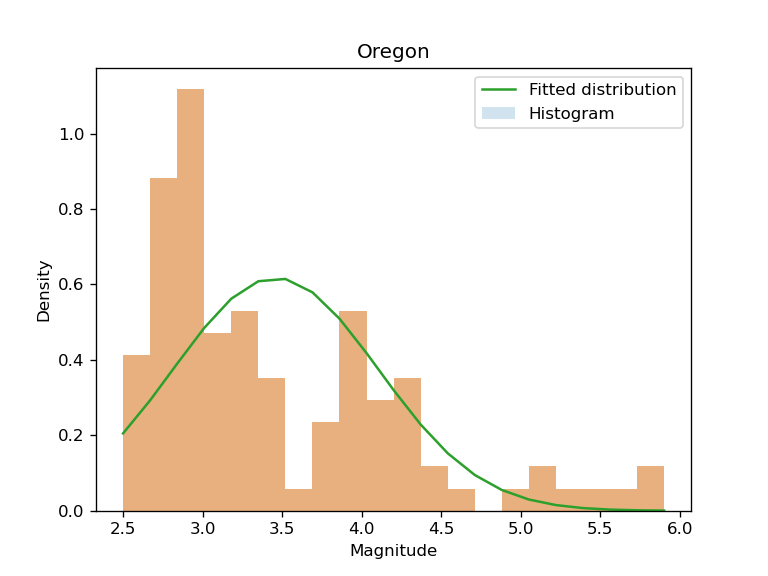

3.4592999999999994 


<IPython.core.display.Javascript object>


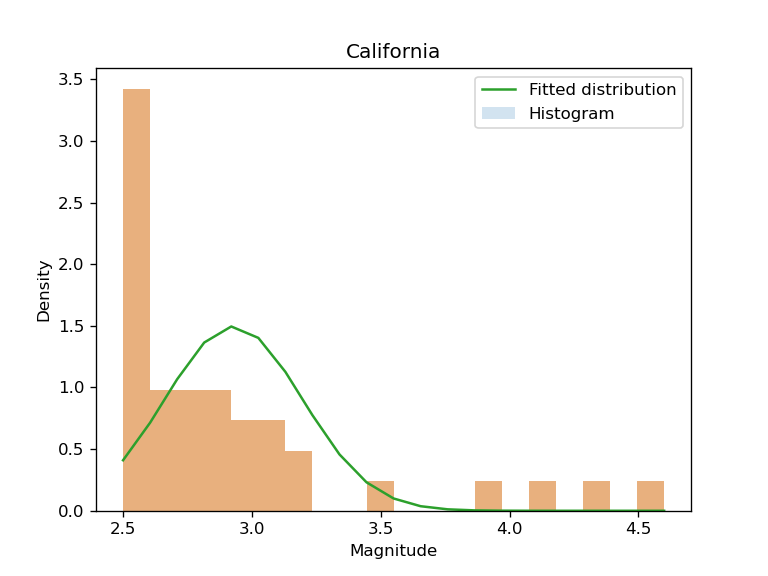

2.929248717948718 


<IPython.core.display.Javascript object>


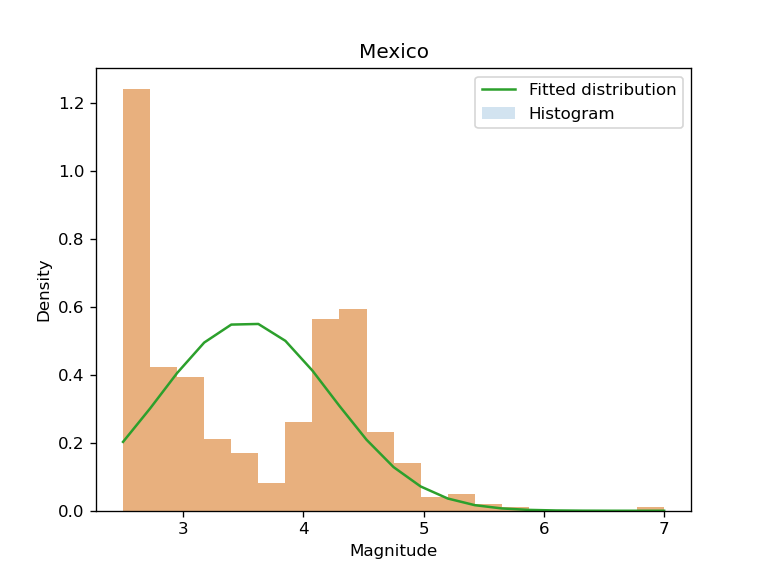

3.5201814058956917 


<IPython.core.display.Javascript object>


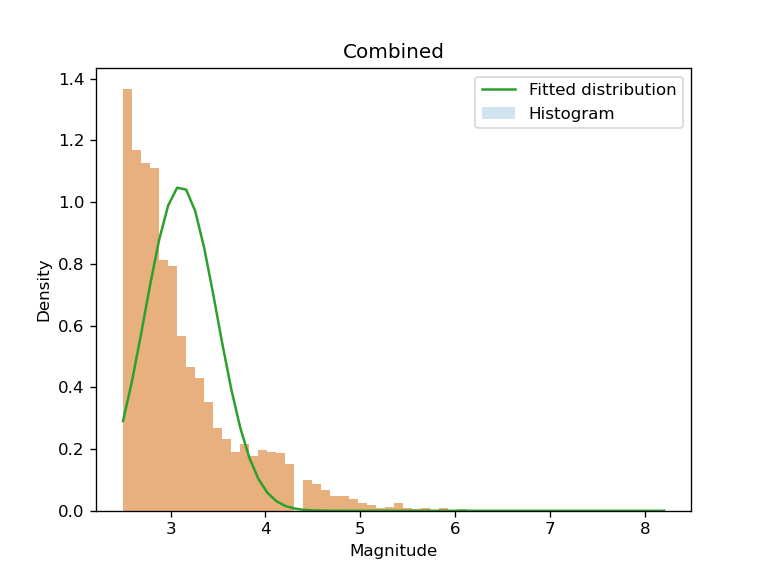

3.1082858130663094 


In [194]:
for i in range(0,7):# the 7 dataframes we have 
    
    fig = plt.figure()
    if i == 6: # for all but the last dataframe in the list we want 20 bins 
        Bins = 60
    else:
        Bins = 20
    
    plt.hist(ListDfs[i].mag,Bins, density = True,alpha = 0.2)
    
    _, bins, _ = plt.hist(ListDfs[i].mag, Bins, density=1, alpha=0.5)
    mu = ListDfs[i].mag.mean() # mu is the mean
    p(ListDfs[i].mag.mean())
    sigma = ListDfs[i].mag.std() # sigma is the Standard deviation 
    best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma**2)
    #p("best_fit_line",best_fit_line)
    
    plt.plot(bins,best_fit_line) 
    #assign information 
    plt.legend(['Fitted distribution','Histogram'])
    plt.title(ListAreas[i])
    plt.ylabel('Density')
    plt.xlabel('Magnitude')
    plt.show()

## Task 4.3. Use the produce map function to produce the world map with the tectonic plate boundaries. You can find the function in the help notebook for students.ipynb notebook that you have been provided.The map will appear under the name map boundaries.html in your jupyter-notebook directory. HINT:An html file can be opened within an internet browser instance. Open it to seewhat this function is doing.

In [195]:
# This function will enable you to produce an empty world map with the plate boundaries plotted in blue",
def produce_map():
    m = folium.Map(location=(0, 0), zoom_start=2) # Plots world map and stores it to variable m",
    url = 'https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json' # plate boundaries\n",
    folium.GeoJson(url, name='geojson').add_to(m) # adds plate boundaries to map \n",
    m.save('map_boundaries.html') # saves map as 'map_boundaries.html'\n",
    return m # returns map\n",

In [196]:
m = produce_map()

## Task 4.4. Overlay the earthquakes in your combined dataset on the map you have created in Task 4.3. Ensure that the earthquakes are CLEARLY visible on the map. Output the plot in the file: combined earthquakes.html. Ensure that the .html file is in the correct directory (same directory as your jupyter notebook). You may use the outputs in the report in Task 5. HINT: Explore the provided produce map function to find the package used to create the map. Research to find information about how to use this package online through the documentation of the package. Then, use this to create your new maps.

In [197]:
fig3=Figure(width=550,height=350)
#m3=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11)
m3 = produce_map()
fig3.add_child(m3)

#Adding markers to the map
for i in range(len(df.index)): 
    long = df.longitude[i] #selecting the longitude 
    lat = df.latitude[i] #and latitude values 
    try:
        folium.Marker(location=[lat, long],popup='DataPoint').add_to(m3) #add the marker at the set longitude and latitude location 
    except:
        True
m3.save('combined earthquakes All Values.html') 

# Task 4.5. Create three different world maps using the earthquakes in your data set corresponding to the following cases:
• Those of magnitude greater or equal to 4
• Those of magnitude greater or equal to 5
• Those of magnitude greater or equal to 6

Name the map corresponding to magnitude X as mag X map.html e.g. mag 5 map.html for all earthquakes
of magnitude greater than 5. Ensure that the maps are output in the same directory as your jupyter
notebook. Please DO NOT submit the html files. It is sufficient to submit the code to generate them

In [198]:
def produce_map2(x):
    m = folium.Map(location=(0, 0), zoom_start=2) # Plots world map and stores it to variable m",
    url = 'https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json' # plate boundaries\n",
    folium.GeoJson(url, name='geojson').add_to(m) # adds plate boundaries to map \n",
    m.save(x) # saves map as 'map_boundaries.html'\n",
    return m # returns map\n",

In [199]:
x = "mag 3 map.html"
m1 = produce_map2(x)#create 
x = "mag 4 map.html"
m2 = produce_map2(x)#create 
x = "mag 5 map.html"
m3 = produce_map2(x)#create 

df = pd.read_csv("earthquakes.csv")
#p(df.columns)
df1 = df[df.mag >= 3] # apply condition required by limitting the mag collumn 
for i in range(len(df1.index)): #for all values 
    long = df.longitude[i] #collect longitude/latitude
    lat = df.latitude[i]
    try:
        folium.Marker(location=[lat, long],popup='DataPoint').add_to(m1) #append amrker to the map 
    except:
        True
m1.save('mag 3 map.html')#save

df1 = df[df.mag >= 4] # apply condition required by limitting the mag collumn 
for i in range(len(df1.index)):#for all values 
    long = df.longitude[i]#collect longitude/latitude
    lat = df.latitude[i]
    try:
        folium.Marker(location=[lat, long],popup='DataPoint').add_to(m2)#append amrker to the map 
    except:
        True
m2.save('mag 4 map.html')#save

df1 = df[df.mag >= 5]# apply condition required by limitting the mag collumn 
for i in range(len(df1.index)):#for all values 
    long = df.longitude[i]#collect longitude/latitude
    lat = df.latitude[i]
    try:
        folium.Marker(location=[lat, long],popup='DataPoint').add_to(m3)#append amrker to the map 
    except:
        True
m3.save('mag 5 map.html')#save

# Further code


### A word of warning when opening the maps created in the last chapter. some of the maps contain thousands of markers on the map and may use a large potion of your computers processing power when opening. If you actually want to see a map i suggest openning this map below as it will contain considerably lower datapoints to allow for fast creation.

### (Map name: combined earthquakes 500 Values.html )

In [200]:
fig3=Figure(width=550,height=350)
#m3=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11)
m6 = produce_map()
fig3.add_child(m6)

#Adding markers to the map
for i in range(0,501): #had to lower this to 500 datapoints as my laptop coundlt open a webpage with larger datapoints 
    long = df.longitude[i]
    lat = df.latitude[i]
    try:
        folium.Marker(location=[lat, long],popup='DataPoint').add_to(m6)
    except:
        True
m6.save('combined earthquakes 500 Values.html')

# Creating the map of the highest damaging earthquakes


In [201]:
x = "mag max map.html"
m4 = produce_map2(x)

dfWorst = df[df["type"] == "earthquake"].sort_values(by = 'mag',ascending = False).head(20)

#p(dfWorst)

for i in range(len(dfWorst.index)):
    long = df.longitude[i]
    lat = df.latitude[i]
    PopUpStr = "Magnitude of " + str(df.mag[i])
    try:
        folium.Marker(location=[lat, long],popup= PopUpStr, tooltip=PopUpStr).add_to(m4) 
    except:
        True
m4.save('mag max map.html')
    